In [1]:
import memory_api as mapi

In [2]:
!hexdump -C -v -n 128 /dev/xillybus_mem_16

00000000  00 00 00 00 00 00 00 00  00 00 00 00 00 00 00 00  |................|
00000010  00 00 00 00 00 00 00 00  00 00 00 00 00 00 00 00  |................|
00000020  00 00 00 00 00 00 00 00  00 00 00 00 00 00 00 00  |................|
00000030  00 00 00 00 00 00 00 00  00 00 00 00 00 00 00 00  |................|
00000040  00 00 00 00 00 00 00 00  00 00 00 00 00 00 00 00  |................|
00000050  00 00 00 00 00 00 00 00  00 00 00 00 00 00 00 00  |................|
00000060  00 00 00 00 00 00 00 00  00 00 00 00 00 00 00 00  |................|
00000070  00 00 00 00 00 00 00 00  00 00 00 00 00 00 00 00  |................|
00000080


### w/r mem_16 from strach

In [3]:
import numpy as np
import struct
from binascii import hexlify
import io

In [5]:
def to_fixed_point(v, dtype='<i4', binpoint=14):
    v = int(v * 2**binpoint)
    value = hexlify(struct.pack(dtype,v))
    # print value
    return struct.pack(dtype,v)

def to_value(hexstring, dtype='<i4', binpoint=14):
    value = struct.unpack(dtype, hexstring)
    value = float(value[0]) / 2**binpoint
    return value

In [10]:
import jupyter_core;jupyter_core.paths.jupyter_config_dir() + '\\custom'

'/groups/apig/home/laic/.jupyter\\custom'

Test this part of verilog:


```verilog

if (user_r_control_regs_16_rden)
    begin
        case(user_control_regs_16_addr)
            5'h00: user_r_control_regs_16_data <= {13'b0, DSP_settle, SPI_run_continuous_in, 1'b0};
            5'h01: user_r_control_regs_16_data <= max_timestep_in[15:0];
            5'h02: user_r_control_regs_16_data <= max_timestep_in[31:16];
            5'h03: user_r_control_regs_16_data <= {dataclk_D[3], dataclk_M, dataclk_O};
            5'h04: user_r_control_regs_16_data <= {delay_D, delay_C, delay_B, delay_A};
            5'h08: user_r_control_regs_16_data <= {aux_cmd_bank_1_D_in, aux_cmd_bank_1_C_in, aux_cmd_bank_1_B_in, aux_cmd_bank_1_A_in};
            5'h09: user_r_control_regs_16_data <= {aux_cmd_bank_2_D_in, aux_cmd_bank_2_C_in, aux_cmd_bank_2_B_in, aux_cmd_bank_2_A_in};
            5'h0A: user_r_control_regs_16_data <= {aux_cmd_bank_3_D_in, aux_cmd_bank_3_C_in, aux_cmd_bank_3_B_in, aux_cmd_bank_3_A_in};
            5'h0B: user_r_control_regs_16_data <= {6'b0, max_aux_cmd_index_1_in};
            5'h0C: user_r_control_regs_16_data <= {6'b0, max_aux_cmd_index_2_in};
            5'h0D: user_r_control_regs_16_data <= {6'b0, max_aux_cmd_index_3_in};
            5'h0E: user_r_control_regs_16_data <= {6'b0, loop_aux_cmd_index_1};
            5'h0F: user_r_control_regs_16_data <= {6'b0, loop_aux_cmd_index_2};
            5'h10: user_r_control_regs_16_data <= {6'b0, loop_aux_cmd_index_3};
            5'h12: user_r_control_regs_16_data <= {data_stream_4_sel, data_stream_3_sel,  data_stream_2_sel,  data_stream_1_sel};  
            5'h13: user_r_control_regs_16_data <= {data_stream_8_sel, data_stream_7_sel,  data_stream_6_sel,  data_stream_5_sel};
            5'h14: user_r_control_regs_16_data <= {data_stream_12_sel, data_stream_11_sel,  data_stream_10_sel,  data_stream_9_sel};
            5'h15: user_r_control_regs_16_data <= {data_stream_16_sel, data_stream_15_sel,  data_stream_14_sel,  data_stream_13_sel};
            5'h16: user_r_control_regs_16_data <= {
            data_stream_16_en_in,
            data_stream_15_en_in,
            data_stream_14_en_in,
            data_stream_13_en_in,
            data_stream_12_en_in,
            data_stream_11_en_in,
            data_stream_10_en_in,
            data_stream_9_en_in,
            data_stream_8_en_in,
            data_stream_7_en_in,
            data_stream_6_en_in,
            data_stream_5_en_in,
            data_stream_4_en_in,
            data_stream_3_en_in,
            data_stream_2_en_in,
            data_stream_1_en_in
            };
            5'h17: user_r_control_regs_16_data <= aux_output;
            default:  user_r_control_regs_16_data <= 16'b0;
        endcase
    end
end

```


*open bidirectional memory as mode `rb+`, you should see reset led off*

In [12]:
reg16 = open('/dev/xillybus_mem_16', 'rb+')

*There are 32 address for `xillybus_control_regs_16`*

In [14]:
addrs = np.arange(0,63,2).astype(int)
value = to_fixed_point(78, '<h', 0)

*write the registers, you should see long led pattern*

In [15]:
i = 2
reg16.seek(addrs[i])
reg16.write(value)
reg16.flush()

*read the registers, you should see short led pattern*

In [16]:
reg16.seek(addrs[i])
hexstring = reg16.read(2)
hexstring

'N\x00'

In [17]:
return_val = to_value(value, '<h', 0)
print return_val

78.0


*close device, you should see reset led on*

In [18]:
reg16.close()

### w/r mem_16 from api

In [4]:
from memory_api import read_mem_16, write_mem_16, mem_reset

In [5]:
write_mem_16(0,1)

In [6]:
read_mem_16(0)

1

In [7]:
!hexdump -C -v -n 128 /dev/xillybus_mem_16

00000000  01 00 00 00 00 00 00 00  00 00 00 00 00 00 00 00  |................|
00000010  00 00 00 00 00 00 00 00  00 00 00 00 00 00 00 00  |................|
00000020  00 00 00 00 00 00 00 00  00 00 00 00 00 00 00 00  |................|
00000030  00 00 00 00 00 00 00 00  00 00 00 00 00 00 00 00  |................|
00000040  01 00 00 00 00 00 00 00  00 00 00 00 00 00 00 00  |................|
00000050  00 00 00 00 00 00 00 00  00 00 00 00 00 00 00 00  |................|
00000060  00 00 00 00 00 00 00 00  00 00 00 00 00 00 00 00  |................|
00000070  00 00 00 00 00 00 00 00  00 00 00 00 00 00 00 00  |................|
00000080


### Load data

In [3]:
from spiketag.base.Binload import bload

In [2]:
nCh = 32
fs  = 25000
bf = bload(nCh=nCh, fs=fs)
bf.load('/mnt/ramdisk/pcie.bin', dtype='int32')

#############  load data  ###################
/mnt/ramdisk/pcie.bin loaded, it contains: 
610322 * 32 points (78121216 bytes) 
32 channels with sampling rate of 25000.0000 
24.413 secs (0.407 mins) of data
#############################################


In [3]:
@vectorize
def twoscomplement(x, hexlen=8):
    if x < 0:
        h = ((abs(x) ^ 0xffffffff) + 1) & 0xffffffff
        s = "{0:#0{1}x}".format(h,hexlen+2)
    else:
        s = "{0:#0{1}x}".format(x,hexlen+2)
    return s

NameError: name 'vectorize' is not defined

In [4]:
twoscomplement(bf.npmm[:4])

NameError: name 'twoscomplement' is not defined

In [5]:
x = bf.npmm.reshape(-1,32)

In [6]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [7]:
x.shape

(610322, 32)

In [8]:
x.shape[0]*x.shape[1]

19530304

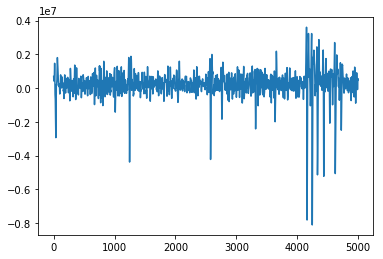

In [9]:
plot(x[0:5000,31])

In [10]:
%gui qt

In [11]:
from spiketag.view import wave_view

In [12]:
wview = wave_view(x[:600000,:], fs=fs, ncols=1)

RuntimeError: context could not be created

In [161]:
wview.show()

ERROR: Invoking <bound method wave_view.update_cursor of <wave_view (PyQt4) at 0x7fd592f2c310>> repeat 8192
  File "/disk0/anaconda2/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/disk0/anaconda2/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/disk0/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/disk0/anaconda2/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/disk0/anaconda2/lib/python2.7/site-packages/ipykernel/kernelapp.py", line 474, in start
    ioloop.IOLoop.instance().start()
  File "/disk0/anaconda2/lib/python2.7/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/disk0/anaconda2/lib/python2.7/site-packages/tornado/ioloop.py", line 831, in start
    self._run_callback(callback)
  File "/disk0/a

### filter test

In [28]:
from scipy import signal

In [29]:
sig = np.repeat([0., 1., 0.], 100)

In [30]:
win = signal.hann(50)

In [17]:
filtered = signal.convolve(sig, win, mode='same') / sum(win)

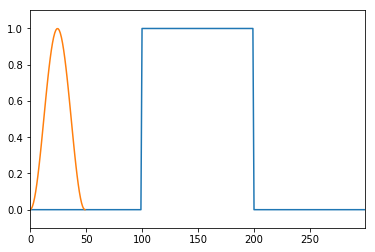

In [32]:
plot(sig)
plt.margins(0, 0.1)
plot(win)
plt.margins(0, 0.1)

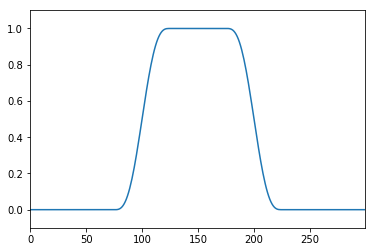

In [19]:
plot(filtered)
plt.margins(0, 0.1)

In [20]:
sig = x[:10000,31]

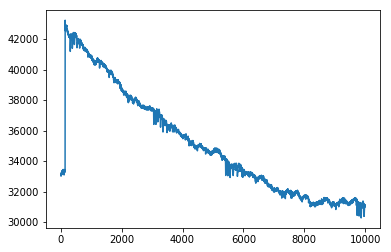

In [21]:
plot(sig)

In [22]:
win = np.array([-0.012767, -0.010065, -0.010603, -0.015188, -0.022775, -0.030649, -0.035635, -0.035833, -0.031967, -0.027421, -0.026643, -0.032443, -0.043479, -0.05342, -0.052658, -0.032253, 0.011402, 0.07339, 0.14032, 0.19411, 0.21834, 0.20454, 0.15583, 0.086166, 0.015233, -0.038734, -0.0654, -0.065287, -0.048177, -0.027911, -0.016061, -0.017338, -0.028613, -0.04164, -0.04788, -0.042934, -0.028503, -0.011142, 0.0013188, 0.0037242, -0.00405, -0.017387, -0.029505, -0.034875, -0.031708, -0.022382, -0.011779, -0.0045782, -0.0029516, -0.0058103, -0.0098116, -0.01144, -0.0089633, -0.0032537, 0.0028751, 0.0063325, 0.0054634, 0.00089644, -0.0048567, -0.0087553, -0.0087668, -0.0047873, 0.0014692, 0.0074606, 0.0111, 0.011659, 0.0098849, 0.0073795, 0.00565, 0.0053717, 0])

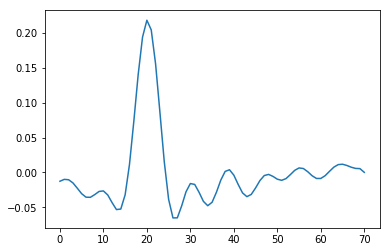

In [23]:
plot(win)

In [55]:
f, Pxx_den = signal.welch(win, fs=25000)

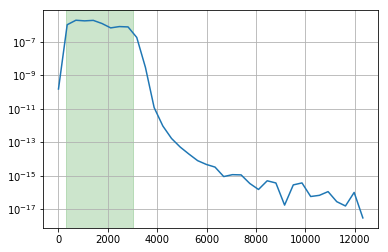

In [56]:
plt.semilogy(f, Pxx_den)
plt.axvspan(300, 3000, color='g',alpha=0.2)
plt.grid('on')

In [63]:
print sig.shape, win.shape

(10000,) (71,)


In [66]:
%timeit filtered = np.convolve(sig, win, mode='same')

1000 loops, best of 3: 390 µs per loop


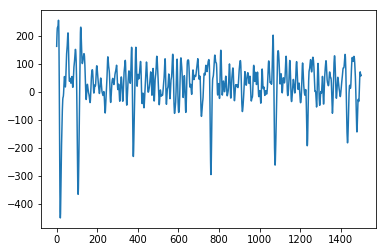

In [64]:
plot(filtered[500:2000])

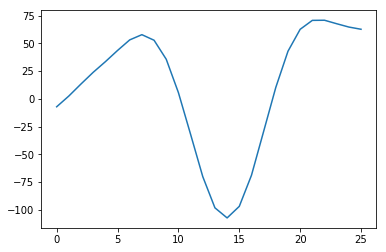

In [28]:
plot(filtered[2137:2163])